 ### Import Libraries and Load Dataset

In [42]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import warnings
warnings.filterwarnings('ignore')

### Read the Dataset - There are 5000 rows and 14 columns in the dataset.

In [43]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.shape

(5000, 14)

In [44]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### All the columns except CCAvg (float) is of datatype int

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Looking at the five point data for all the columns (Experience has a minimum value of -3 which is odd)

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Correcting the experience value to 0 (whichever is -3)

In [47]:
df['Experience'].values[df['Experience'].values < 0] = df['Experience'].mean()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [48]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Looking for null in the dataset, none of the columns have any null values.

In [49]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Looking for unique values in the data set. All the account columns (Personal Loan, Securities Account, CD Account) , Online and Credit Card have only 2 unique values. Education and Family has 3 and 4 unique values respectively.

In [50]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### No. of people with Zero Mortgages

In [51]:
df[df['Mortgage']==0].shape[0]

3462

### Number of people with zero credit card spending per month

In [52]:
df[df['CCAvg']==0].shape[0]

106

In [53]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Value counts in categorical variables (Family, Education, Personal Loan, Securities Account, CD Account, Online, Credit Card)

### Univarate Analysis - Looking at distplot for the continuous columns and count plots for the others

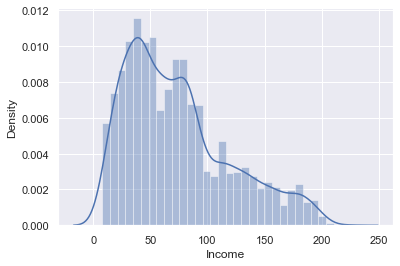

In [54]:
# distplot for continous columns
sns.distplot(df['Income'])
plt.show()

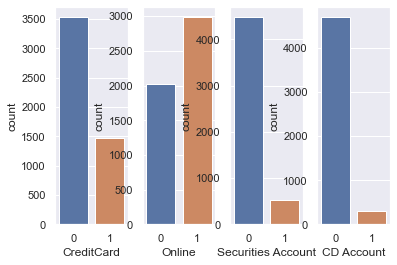

In [55]:
fig, ax =plt.subplots(1,4)
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot(x=df['CreditCard'],ax=ax[0]);
sns.countplot(x=df['Online'],ax=ax[1]);
sns.countplot(x=df['Securities Account'],ax=ax[2]);
sns.countplot(x=df['CD Account'],ax=ax[3]);

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

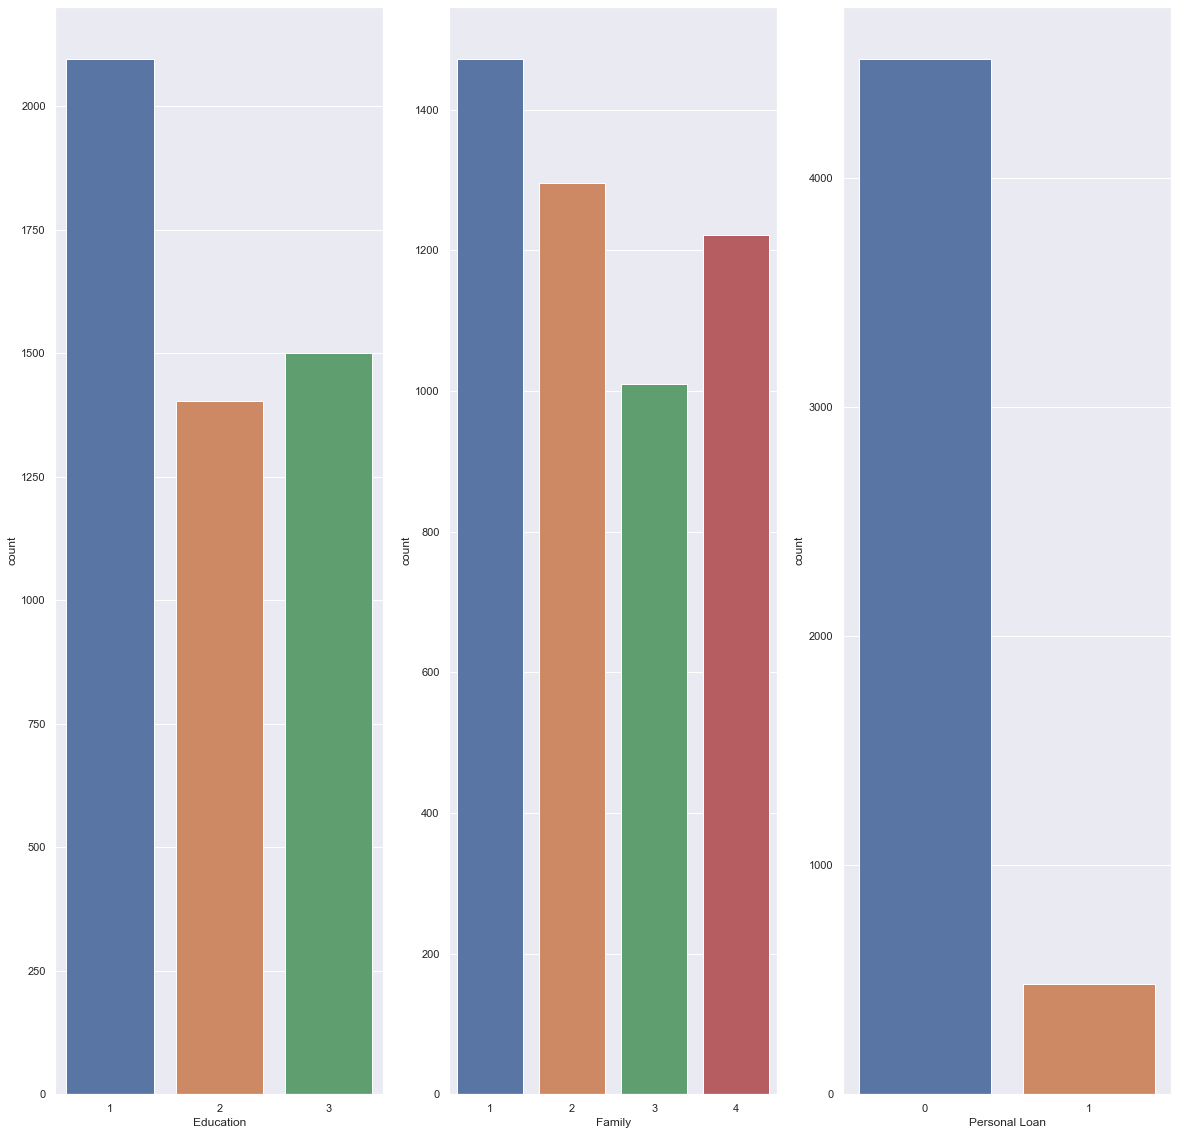

In [56]:
fig, ax =plt.subplots(1,3)
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(x=df['Education'],ax=ax[0])
sns.countplot(x=df['Family'],ax=ax[1])
sns.countplot(x=df['Personal Loan'],ax=ax[2])

### Bivarate Analysis - Looking at Personal Loan vs other columns of interest

In [57]:
#ct=pd.crosstab(df['Family'],df['Personal Loan'],normalize='index')
#ct.plot.bar(stacked=True)
pd.crosstab(df['Family'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


### Looking at the crosstab, we could see customers who take Personal Loan or not are similar across the across the family size

In [58]:
#ct=pd.crosstab(df['Online'],df['Personal Loan'],normalize='index')
#ct.plot.bar(stacked=True)
pd.crosstab(df['Online'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


### Looking at the crosstab, we could see Personal Loan across the customers with online accounts or not is similar

In [59]:
#ct=pd.crosstab(df['Securities Account'],df['Personal Loan'],normalize='index')
#ct.plot.bar(stacked=True)
pd.crosstab(df['Securities Account'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


### Looking at the crosstab, we could see Personal Loan across the customer with Securities account or not is similar.

In [60]:
#ct=pd.crosstab(df['CD Account'],df['Personal Loan'],normalize='index')
#ct.plot.bar(stacked=True)
pd.crosstab(df['CD Account'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


### Looking at the crosstab, we could see Personal Loan across the customers with CD accounts are quite varying.

### Just looking at how scattered the plots are for some variables.

<AxesSubplot:xlabel='ID', ylabel='Age'>

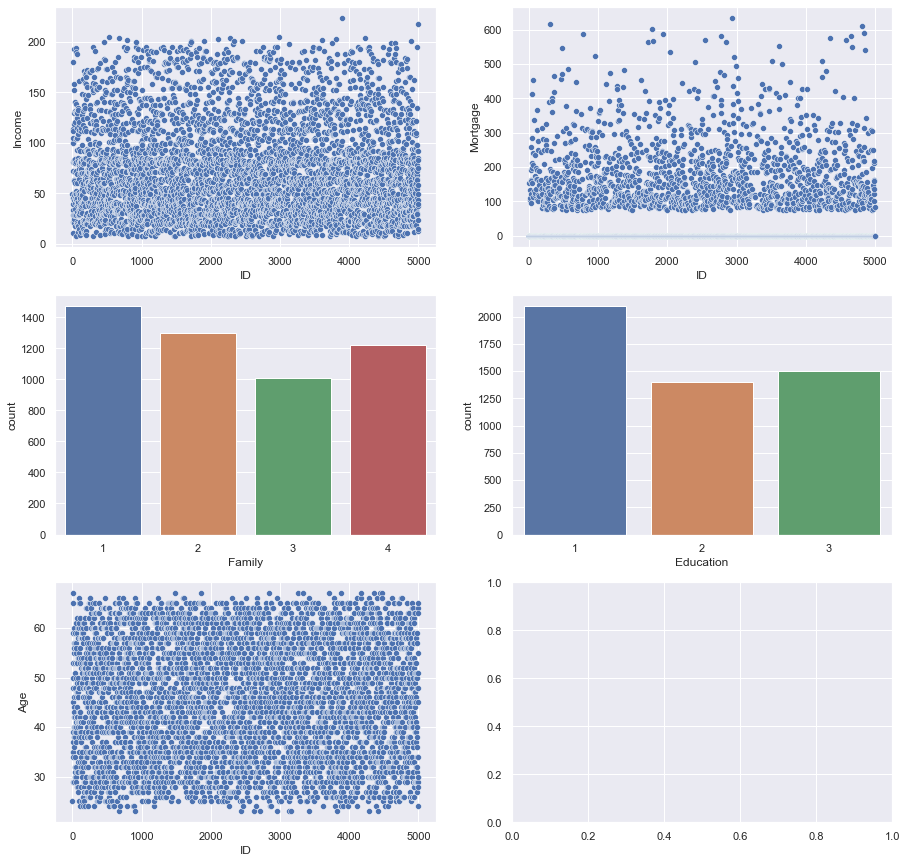

In [61]:
fig, ax =plt.subplots(3,2)
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(x=df['ID'],y=df['Income'],ax=ax[0,0])
sns.scatterplot(x=df['ID'],y=df['Mortgage'],ax=ax[0,1])
sns.countplot(x=df['Family'],ax=ax[1,0])
sns.countplot(x=df['Education'],ax=ax[1,1])
sns.scatterplot(x=df['ID'],y=df['Age'],ax=ax[2,0])

### Correlation map of the variables

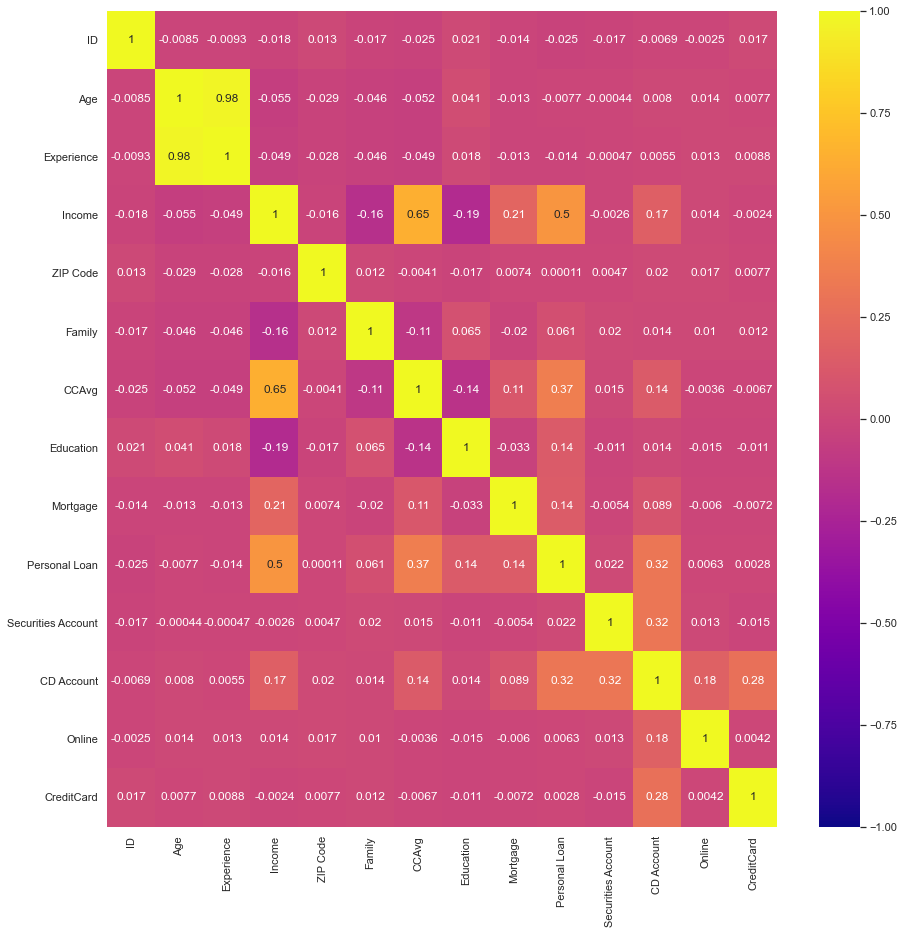

In [62]:
cor=df.corr()
sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1);

### From the corelation map it looks like Personal is highly corelated with CD Account , CCAvg 

## Convert Age, Income and Experience into categorical features by grouping them into different intervals

In [63]:
agebins = [23, 34, 45, 56, 67]
agecats = ['23-34', '34-45', '45-56', '56-67']
df["Age_cat"] = pd.cut(df.Age, agebins, labels=agecats)

expbins = [0, 10, 20, 30, 43]
expcats = ['0-9', '10-19', '20-29', '30-43']
df["Exp_cat"] = pd.cut(df.Experience, expbins, labels=expcats)

df['Income_cat']=pd.qcut(df['Income'], q=5)

In [64]:
cr_df = df.drop(['ID','Age','Experience','Income'], axis =1 ) # dropping this column as it will be 1-1 mapping or categorized anyways
cr_df.head()

,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_cat,Exp_cat,Income_cat
0,91107,4,1.6,1,0,0,1,0,0,0,23-34,0-9,"(33.0, 52.0]"
1,90089,3,1.5,1,0,0,1,0,0,0,34-45,10-19,"(33.0, 52.0]"
2,94720,1,1.0,1,0,0,0,0,0,0,34-45,10-19,"(7.999, 33.0]"
3,94112,1,2.7,2,0,0,0,0,0,0,34-45,0-9,"(78.0, 113.0]"
4,91330,4,1.0,2,0,0,0,0,0,1,34-45,0-9,"(33.0, 52.0]"


### Converting the datatype to category and 8 Prepare input data for the model


In [65]:
cr_df['Securities Account'] = cr_df['Securities Account'].astype('category')
cr_df['Online'] = cr_df['Online'].astype('category')
cr_df['CreditCard'] = cr_df['CreditCard'].astype('category')
cr_df['CD Account'] = cr_df['CD Account'].astype('category')
cr_df['Education'] = cr_df['Education'].astype('category')
cr_df['Family'] = cr_df['Family'].astype('category')

Y = cr_df['Personal Loan'].astype('category')
X = cr_df[['CCAvg','Education','Mortgage','Age_cat','Exp_cat','Income_cat','CD Account','Securities Account','Online','CreditCard','Education','Family']]

In [66]:
X=pd.get_dummies(X,drop_first=True)
X

,CCAvg,Mortgage,Education_2,Education_3,Age_cat_34-45,Age_cat_45-56,Age_cat_56-67,Exp_cat_10-19,Exp_cat_20-29,Exp_cat_30-43,...,"Income_cat_(113.0, 224.0]",CD Account_1,Securities Account_1,Online_1,CreditCard_1,Education_2,Education_3,Family_2,Family_3,Family_4
0,1.6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1.5,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.7,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.9,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4996,0.4,85,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4997,0.3,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4998,0.5,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0


In [67]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,CCAvg,Mortgage,Education_2,Education_3,Age_cat_34-45,Age_cat_45-56,Age_cat_56-67,Exp_cat_10-19,Exp_cat_20-29,Exp_cat_30-43,...,"Income_cat_(113.0, 224.0]",CD Account_1,Securities Account_1,Online_1,CreditCard_1,Education_2,Education_3,Family_2,Family_3,Family_4
1334,1.3,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4768,2.0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
65,3.8,0,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,0,0
177,1.8,244,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4489,0.2,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


### Predict Target Variable for Test Data using Sklearn

In [68]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=4294967295,fit_intercept=False)
#logreg = LogisticRegression()
logreg.fit(x_train, y_train)   

LogisticRegression(fit_intercept=False, random_state=4294967295)

In [69]:
y_predict = logreg.predict(x_test)              # Predicting the target variable on test data

In [70]:
# Observe the predicted and observed classes in a dataframe.
z = x_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z[z['Predicted Personal Loan']==1].shape
z.head()

,CCAvg,Mortgage,Education_2,Education_3,Age_cat_34-45,Age_cat_45-56,Age_cat_56-67,Exp_cat_10-19,Exp_cat_20-29,Exp_cat_30-43,...,Securities Account_1,Online_1,CreditCard_1,Education_2,Education_3,Family_2,Family_3,Family_4,Observed Personal Loan,Predicted Personal Loan
2764,2.9,105,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4767,0.9,101,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3814,1.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3499,0.3,286,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2735,2.6,165,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0


In [71]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

## Printing the different scores (Accuracy, Recall, Precision, F1 Score, ROC AuC Score and Confusion Matrix

Trainig accuracy 0.9191428571428572

Testing accuracy 0.9026666666666666

Confusion Matrix


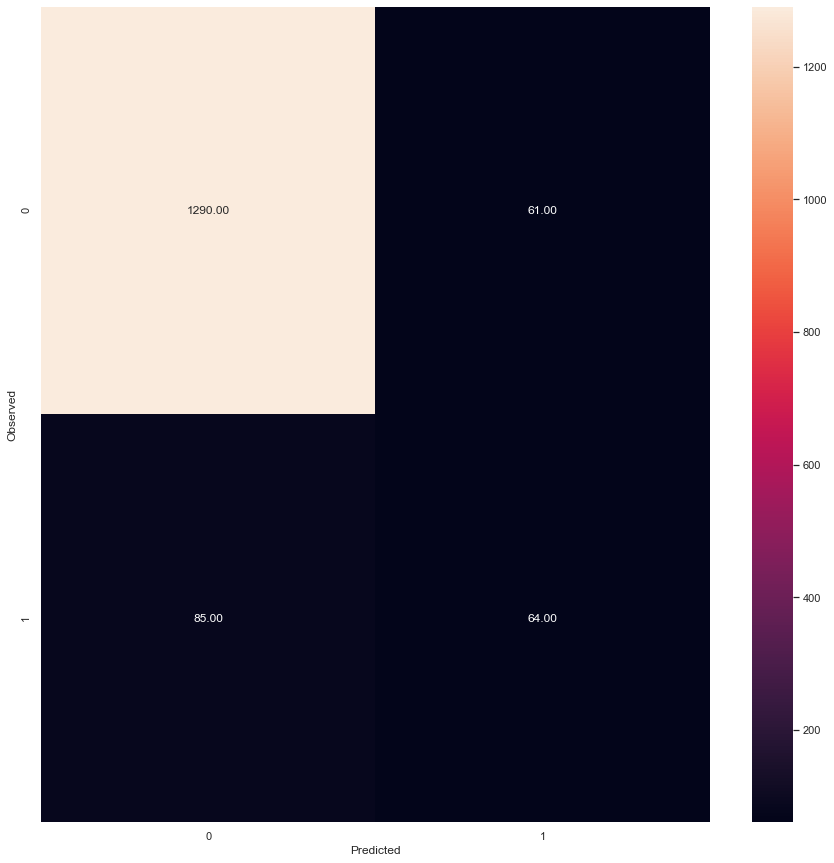

None
Recall: 0.42953020134228187

Precision: 0.512

F1 Score: 0.46715328467153283

Roc Auc Score: 0.8932384164849303


In [72]:
print("Trainig accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1] ))

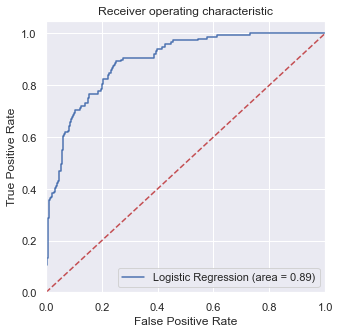

In [73]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Here are the coefficients for all the attributes

In [74]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
14,CD Account_1,4.17
10,"Income_cat_(33.0, 52.0]",3.79
11,"Income_cat_(52.0, 78.0]",3.34
13,"Income_cat_(113.0, 224.0]",1.80
17,CreditCard_1,1.79
16,Online_1,1.57
15,Securities Account_1,1.41
20,Family_2,1.33
4,Age_cat_34-45,1.05
5,Age_cat_45-56,1.05


In [75]:
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = logreg.predict_proba(x_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = logreg.predict_proba(x_test)[:,1]

# threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1
z['Predicted'] = logreg.predict(x_test) 

### Test Data where the observed class is not equal to predicted class.

In [76]:
z[z['Actual'] !=z['Predicted']]

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
16,1,0.857359,0.142641,0
28,0,0.385544,0.614456,1
51,1,0.975608,0.024392,0
80,0,0.484188,0.515812,1
86,0,0.384636,0.615364,1
...,...,...,...,...
1390,1,0.898154,0.101846,0
1406,0,0.458023,0.541977,1
1427,1,0.708810,0.291190,0
1434,1,0.971700,0.028300,0


### If you want to move the threshold then we can adjust it based on the below rules. Here i have set the threshold to be 0.25 and the new probability is adjusted.

In [77]:
z['Adjusted Predicted'] = z['Probaility that output is 1'].apply(lambda x: 1 if x >0.25 else 0)
z[z['Adjusted Predicted']==1]

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted,Adjusted Predicted
5,0,0.746845,0.253155,0,1
27,1,0.226301,0.773699,1,1
28,0,0.385544,0.614456,1,1
29,0,0.661283,0.338717,0,1
34,1,0.243724,0.756276,1,1
...,...,...,...,...,...
1460,0,0.697688,0.302312,0,1
1479,1,0.113244,0.886756,1,1
1481,1,0.711679,0.288321,0,1
1484,1,0.229673,0.770327,1,1


In [78]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1351
           1       0.51      0.43      0.47       149

    accuracy                           0.90      1500
   macro avg       0.73      0.69      0.71      1500
weighted avg       0.90      0.90      0.90      1500



### Predicted Probability distribution Plots for defaulters and non defaulters

<AxesSubplot:xlabel='Probaility that output is 1'>

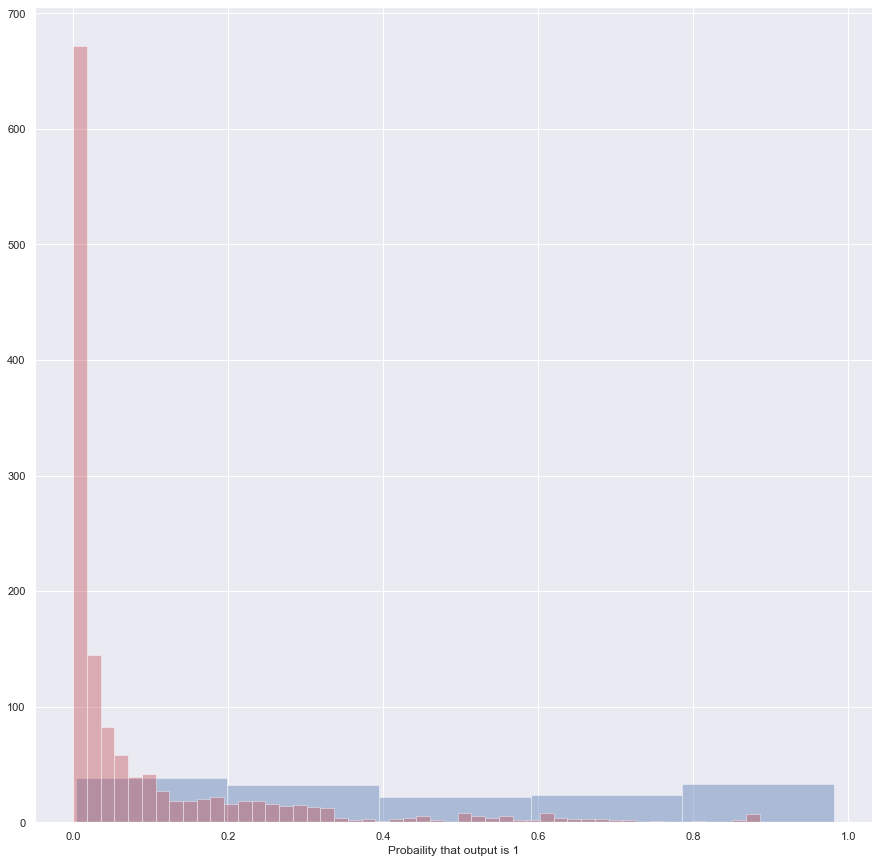

In [79]:
sns.distplot( z[z['Actual'] == 1]["Probaility that output is 1"], kde=False, color = 'b' )
sns.distplot( z[z['Actual'] == 0]["Probaility that output is 1"], kde=False, color = 'r' )

## Conclusion
Business Insights
Confusion matrix means

True Positive (observed=1,predicted=1):

Predicted that personal loan will be offered to the customer and the customer will need one

False Positive (observed=0,predicted=1):

Predicted that personal loan will be offered and the customer don't need one.

True Negative (observed=0,predicted=0):

Predicted that personal loan will not be offered and the customer will not need one

False Negative (observed=1,predicted=0):

Predicted that personal loan will not be offered and the customer needs one.

Important Features
"CD Account(1)", "Income cat, Credit Card, Online and Securitie Account"

seems to be top 5 features which influence the model's output. Based on the coefficients value.

"CCAvg", "Mortgage"

have coefficients value as 0 (or close to 0) so these feature doesn't help model in predicting target variable.


Important Metric
Here the bank wants to offer personal loan to the customer and the customer should avail that. The focus should be on true negatives and false positives. The campaign should try and convert this segment and offer them attractive packages so that they can avail the offer and take the personal loan with the Bank.

In case of False negative bank will lose few customers but it will be good to include them in the campaign depending on the bank's policy because they are potential customers who will be taking up the personal loan though the prediction might be wrong wrong.

After achieving the desired accuracy we can deploy the model for practical use. The bank can predict who will be their potential customers for personal loan and they can use the model for coming up with the offers for their upcoming customers.